In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Code from Chapter 1 of the Fast AI Book along with my comments, notes and excerpts from the book.

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *
from fastai.vision.all import *

> The hardest part of deep learning is artisanal: how do you know if you've got enough data, whether it is in the right format, if your model is training properly, and, if it's not, what you should do about it? That is why we believe in learning by doing. As with basic data science skills, with deep learning you only get better through practical experience. Trying to spend too much time on the theory can be counterproductive. The key is to just code and try to solve problems: the theory can come later, when you have context and motivation.

> So, what sorts of tasks make for good test cases? You could train your model to distinguish between Picasso and Monet paintings or to pick out pictures of your daughter instead of pictures of your son. It helps to focus on your hobbies and passions–-setting yourself four or five little projects rather than striving to solve a big, grand problem tends to work better when you're getting started. Since it is easy to get stuck, trying to be too ambitious too early can often backfire. Then, once you've got the basics mastered, aim to complete something you're really proud of!

In [7]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=39,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.145059,0.022185,0.008119,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.071556,0.019470,0.006766,01:03


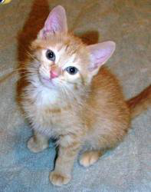

In [9]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [10]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [14]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
print(_)

Is this a cat?: True.
Probability it's a cat: 1.000000
TensorBase(1)


A traditional program looks like this:

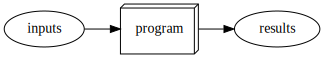

In [17]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

An ML model during training looks like this: (Samuel used the word "weights" in his 1962 essay. We now call these parameters and the word "weights" is specifically used for neural net weights.)

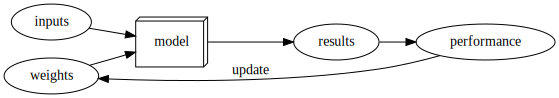

In [18]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

After training, we stop updating the wrights based on performance and the final weights become a part of the model, which is capacle of performing the task we have trained it to perform: (Hence, a trained model can be treated just like a regular computer program)

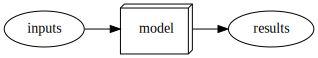

In [19]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

>if you regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the universal approximation theorem shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

>But what about that process? One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists! This is called stochastic gradient descent (SGD). We'll see how neural networks and SGD work in detail in <<chapter_mnist_basics>>, as well as explaining the universal approximation theorem. For now, however, we will instead use Samuel's own words: *We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.*

Modern deep learning terminology for all the pieces we have discussed:

*     The functional form of the *model* is called its *architecture* (but be careful—sometimes people use *model* as a synonym of *architecture*, so this can get confusing).
*     The *weights* are called *parameters*.
*     The *predictions* are calculated from the *independent variable*, which is the *data* not including the *labels*.
*     The *results* of the model are called *predictions*.
*     The measure of *performance* is called the *loss*.
*     The *loss* depends not only on the predictions, but also the correct *labels* (also known as *targets* or the *dependent variable*); e.g., "dog" or "cat."


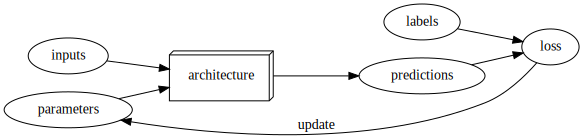

In [20]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')



Another critical insight comes from considering how a model interacts with its environment. This can create feedback loops, as described here:

*     A predictive policing model is created based on where arrests have been made in the past. In practice, this is not actually predicting crime, but rather predicting arrests, and is therefore partially simply reflecting biases in existing policing processes.
*     Law enforcement officers then might use that model to decide where to focus their police activity, resulting in increased arrests in those areas.
*     Data on these additional arrests would then be fed back in to retrain future versions of the model.

This is a positive feedback loop, where the more the model is used, the more biased the data becomes, making the model even more biased, and so forth.

Feedback loops can also create problems in commercial settings. For instance, a video recommendation system might be biased toward recommending content consumed by the biggest watchers of video (e.g., conspiracy theorists and extremists tend to watch more online video content than the average), resulting in those users increasing their video consumption, resulting in more of those kinds of videos being recommended. We'll consider this topic more in detail in <<chapter_ethics>>.


>A Transform contains code that is applied automatically during training; fastai includes many predefined Transforms, and adding new ones is as simple as creating a Python function. There are two kinds: item_tfms are applied to each item (in this case, each item is resized to a 224-pixel square), while batch_tfms are applied to a batch of items at a time using the GPU, so they're particularly fast (we'll see many examples of these throughout this book).

>Note: Classification and Regression: classification and regression have very specific meanings in machine learning. These are the two main types of model that we will be investigating in this book. A classification model is one which attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat." A regression model is one which attempts to predict one or more numeric quantities, such as a temperature or a location. Sometimes people use the word regression to refer to a particular kind of model called a linear regression model; this is a bad practice, and we won't be using that terminology in this book!

>You will learn many methods to avoid overfitting in this book. However, you should only use those methods after you have confirmed that overfitting is actually occurring (i.e., you have actually observed the validation accuracy getting worse during training). We often see practitioners using over-fitting avoidance techniques even when they have enough data that they didn't need to do so, ending up with a model that may be less accurate than what they could have achieved.

>Most of the time, however, picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called ResNet that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems. The 34 in resnet34 refers to the number of layers in this variant of the architecture (other options are 18, 50, 101, and 152). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse - more layers means more weights so it can memorise data more easily). On the other hand, when using more data, they can be quite a bit more accurate.

In transfer learning, the last layer of a pretrained model is removed and replaced by layer(s) with randomised weights, of an appropriate size for our dataset. This is called the head of the model.

>But why is the method called fine_tune, and not fit? fastai actually does have a method called fit, which does indeed fit a model (i.e. look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. As you'll learn in this book, there are some important tricks to adapt a pretrained model for a new dataset—a process called fine-tuning.

When you use the fine_tune method, fastai will use these tricks for you. There are a few parameters you can set (which we'll discuss later), but in the default form shown here, it does two steps:

1.     Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your dataset.
2.     Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which, as we'll see, generally don't require many changes from the pretrained weights).


>As you can see, the different types of malware look very distinctive to the human eye. The model the researchers trained based on this image representation was more accurate at malware classification than any previous approach shown in the academic literature. This suggests a good rule of thumb for converting a dataset into an image representation: if the human eye can recognize categories from the images, then a deep learning model should be able to do so too.

This is because CNNs have been found to focus on features very similar to brains/manual classification methods.

> In general, you'll find that a small number of general approaches in deep learning can go a long way, if you're a bit creative in how you represent your data! You shouldn't think of approaches like the ones described here as "hacky workarounds," because actually they often (as here) beat previously state-of-the-art results. These really are the right ways to think about these problem domains.

We just covered a lot of information so let's recap briefly, <<dljargon>> provides a handy vocabulary.

```asciidoc
[[dljargon]]
.Deep learning vocabulary
[options="header"]
|=====
| Term | Meaning
|Label | The data that we're trying to predict, such as "dog" or "cat"
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
|Model | The combination of the architecture with a particular set of parameters
|Parameters | The values in the model that change what task it can do, and are updated through model training
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
|Train | A synonym for _fit_
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
|Fine-tune | Update a pretrained model for a different task
|Epoch | One complete pass through the input data
|Loss | A measure of how good the model is, chosen to drive training via SGD
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
|Validation set | A set of data held out from training, used only for measuring how good the model is
|Training set | The data used for fitting the model; does not include any data from the validation set
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
|=====
```

With this vocabulary in hand, we are now in a position to bring together all the key concepts introduced so far. Take a moment to review those definitions and read the following summary. If you can follow the explanation, then you're well equipped to understand the discussions to come.

*Machine learning* is a discipline where we define a program not by writing it entirely ourselves, but by learning from data. *Deep learning* is a specialty within machine learning that uses *neural networks* with multiple *layers*. *Image classification* is a representative example (also known as *image recognition*). We start with *labeled data*; that is, a set of images where we have assigned a *label* to each image indicating what it represents. Our goal is to produce a program, called a *model*, which, given a new image, will make an accurate *prediction* regarding what that new image represents.

Every model starts with a choice of *architecture*, a general template for how that kind of model works internally. The process of *training* (or *fitting*) the model is the process of finding a set of *parameter values* (or *weights*) that specialize that general architecture into a model that works well for our particular kind of data. In order to define how well a model does on a single prediction, we need to define a *loss function*, which determines how we score a prediction as good or bad.

To make the training process go faster, we might start with a *pretrained model*—a model that has already been trained on someone else's data. We can then adapt it to our data by training it a bit more on our data, a process called *fine-tuning*.

When we train a model, a key concern is to ensure that our model *generalizes*—that is, that it learns general lessons from our data which also apply to new items it will encounter, so that it can make good predictions on those items. The risk is that if we train our model badly, instead of learning general lessons it effectively memorizes what it has already seen, and then it will make poor predictions about new images. Such a failure is called *overfitting*. In order to avoid this, we always divide our data into two parts, the *training set* and the *validation set*. We train the model by showing it only the training set and then we evaluate how well the model is doing by seeing how well it performs on items from the validation set. In this way, we check if the lessons the model learns from the training set are lessons that generalize to the validation set. In order for a person to assess how well the model is doing on the validation set overall, we define a *metric*. During the training process, when the model has seen every item in the training set, we call that an *epoch*.

All these concepts apply to machine learning in general. That is, they apply to all sorts of schemes for defining a model by training it with data. What makes deep learning distinctive is a particular class of architectures: the architectures based on *neural networks*. In particular, tasks like image classification rely heavily on *convolutional neural networks*, which we will discuss shortly.

# DL Examples for stuff other than Image Classification

**1) Localizing objects in a picture (Image Segmentation)**

In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.361144,2.638919,00:13


epoch,train_loss,valid_loss,time
0,2.107715,1.779817,00:03
1,1.768207,1.300383,00:02
2,1.566377,1.191127,00:03
3,1.398025,1.075766,00:03
4,1.249149,0.938843,00:02
5,1.125992,0.824091,00:03
6,1.022096,0.795643,00:03
7,0.940895,0.789037,00:02


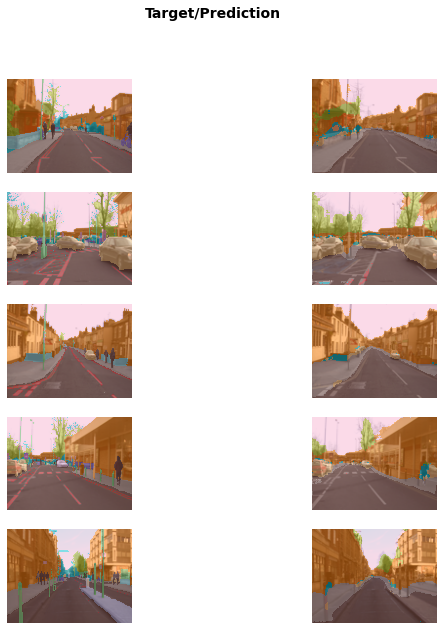

In [8]:
learn.show_results(max_n=5, figsize=(10,10))

**2) Movie Review Sentiment Classifier (NLP)**

Other NLP tasks possible using Deep Learning: 
* generating text
* translating from one language to another
* analyzing comments
* labelling words in sentences

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn.predict("I really liked that movie!")

In [ ]:
learn.predict("I am not sure I particularly enjoyed the movie.")

In [ ]:
doc(learn.predict) #for help, docs and source code

**3) Models from tabular data**

Predict one column of a table based on information in other columns of the table.

Predict whether a person is a high-income earner, based on their socioeconomic background:

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
    cat_names = )